In [2]:
import json

import bz2
#import regex
from tqdm import tqdm
from scipy import sparse

In [3]:

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [01:17, 2596.08it/s]


In [5]:
len(responses)

153499

In [6]:
responses[0]

{'city': 'г. Москва',
 'rating_not_checked': False,
 'title': 'Жалоба',
 'num_comments': 0,
 'bank_license': 'лицензия № 2562',
 'author': 'uhnov1',
 'bank_name': 'Бинбанк',
 'datetime': '2015-06-08 12:50:54',
 'text': 'Добрый день! Я не являюсь клиентом банка и поручителем по кредитному договору, а также не являюсь каким-либо другим лицом, письменно  оформившим отношения с банком по поводу урегулирования чьей-либо  задолженности.  Начиная с марта 2015 года начали приходить бесконечные письма из ООО "Примо коллект"на мой адрес: город Москва, Уваровский переулок, дом 10, квартира 111, с угрозами о возбуждении уголовного дела в отношении гражданина Филиппова Эдуарда Владимировича, который уклоняется от уплаты взятых им кредитов: договор № 81014 от 20.10.2013 года и договор № 2464946 от 09.10.2014 года. Со всей ответственностью\xa0 хочу Вас заверить, что вышеуказанный гражданин, которого Вы разыскиваете, мне не знаком и никогда в моем адресе не был зарегистрирован. Каким образом Вы не удо

## Часть1

### Задание 1 (Посчитайте количество отзывов в разных городах и на разные банки)

In [7]:
import collections

In [8]:
c = collections.Counter()

In [9]:
for city in responses:
    c[city['city']]+=1

In [10]:
c

Counter({'г. Москва': 55354,
         'г. Новосибирск': 2300,
         'г. Ставрополь': 696,
         'г. Челябинск': 1507,
         'г. Волгоград': 1014,
         'г. Пермь': 1163,
         'г. Ростов-на-Дону': 1891,
         'г. Воронеж': 1210,
         'г. Таганрог (Ростовская обл.)': 8,
         'г. Санкт-Петербург': 14342,
         'г. Конаково': 9,
         'г. Мурманск': 434,
         'г. Волгодонск (Ростовская обл.)': 7,
         'г. Большеречье': 2,
         'г. Одинцово (Московская обл.)': 8,
         'г. Салават (Республика Башкортостан)': 4,
         'г. Краснодар': 1262,
         'г. Кострома': 160,
         'г. Нижний Новгород': 1976,
         'г. Орел': 234,
         'г. Саратов': 933,
         'г. Казань': 1440,
         'г. Реутов (Московская обл.)': 3,
         'г. Ульяновск': 500,
         'г. Красноярск': 1236,
         'г. Хабаровск': 681,
         'г. Магнитогорск (Челябинская обл.)': 16,
         'г. Фролово (Волгоградская обл.)': 1,
         'г. Новочеркасск': 6

In [11]:
c = collections.Counter()
for banky in responses:
    c[banky['bank_name']]+=1

In [11]:
c

Counter({'г. Москва': 55354,
         'г. Новосибирск': 2300,
         'г. Ставрополь': 696,
         'г. Челябинск': 1507,
         'г. Волгоград': 1014,
         'г. Пермь': 1163,
         'г. Ростов-на-Дону': 1891,
         'г. Воронеж': 1210,
         'г. Таганрог (Ростовская обл.)': 8,
         'г. Санкт-Петербург': 14342,
         'г. Конаково': 9,
         'г. Мурманск': 434,
         'г. Волгодонск (Ростовская обл.)': 7,
         'г. Большеречье': 2,
         'г. Одинцово (Московская обл.)': 8,
         'г. Салават (Республика Башкортостан)': 4,
         'г. Краснодар': 1262,
         'г. Кострома': 160,
         'г. Нижний Новгород': 1976,
         'г. Орел': 234,
         'г. Саратов': 933,
         'г. Казань': 1440,
         'г. Реутов (Московская обл.)': 3,
         'г. Ульяновск': 500,
         'г. Красноярск': 1236,
         'г. Хабаровск': 681,
         'г. Магнитогорск (Челябинская обл.)': 16,
         'г. Фролово (Волгоградская обл.)': 1,
         'г. Новочеркасск': 6

### Задание 3 (Найдите 10 самых частых: слов, слов без стоп-слов, лемм)

In [198]:

texts=[]
for text in responses:
    texts.append(text['text'])

In [199]:
from nltk.tokenize import word_tokenize
from string import punctuation

In [207]:
from collections import Counter
corpus = [token for tweet in texts[0:10000] for token in word_tokenize(tweet) if token not in punctuation]
# print(len(corpus))
# corpus[:10]



In [208]:
freq_dict = Counter(corpus)
freq_dict.most_common(10)

[('в', 66114),
 ('и', 56606),
 ('не', 47832),
 ('на', 37083),
 ('что', 34420),
 ('с', 26168),
 ('я', 25483),
 ('по', 20863),
 ('мне', 17420),
 ('банка', 14602)]

In [210]:
from nltk.corpus import stopwords

In [214]:
%%time
no_stop_words = [token for tweet in texts[0:10000] for token in word_tokenize(tweet) if token not in stopwords.words('russian')]
freq_dict_without_stop_words = Counter(no_stop_words)
freq_dict_without_stop_words.most_common(10)

Wall time: 25min 3s


[(',', 181917),
 ('.', 123804),
 ('!', 18319),
 (')', 16581),
 ('(', 15593),
 ('банка', 14602),
 ('-', 13662),
 ('``', 11910),
 ("''", 11842),
 ('?', 11542)]

In [284]:
from pymystem3 import Mystem
mystem_analyzer = Mystem()

In [216]:
noise=stopwords.words('russian')+list(punctuation)

In [217]:
no_stop_words=[]
i=0
for text in texts:
    #print(text)
    lemm1=mystem_analyzer.lemmatize(text)
    no_stop_words=no_stop_words+([token for tweet in lemm1 for token in word_tokenize(tweet) if token not in noise])
    if i%100 == 0: print('Processed {} of {}'.format(i, len(texts)))
    
    if i==1000:
        break
    i+=1
freq_dict_without_stop_words = Counter(no_stop_words)
freq_dict_without_stop_words.most_common(10)

Processed 0 of 153499
Processed 100 of 153499
Processed 200 of 153499
Processed 300 of 153499
Processed 400 of 153499
Processed 500 of 153499
Processed 600 of 153499
Processed 700 of 153499
Processed 800 of 153499
Processed 900 of 153499
Processed 1000 of 153499


[('банк', 3751),
 ('``', 2232),
 ('карта', 1802),
 ('это', 1227),
 ('кредит', 937),
 ('который', 866),
 ('деньги', 853),
 ('день', 834),
 ('вклад', 817),
 ('клиент', 773)]

In [229]:
len(no_stop_words)

131614

### Задание 2 (Постройте гистограмы длин слов в символах и в словах (не обязательно))

In [232]:
chars=[]
for word in no_stop_words:
    chars.append(len(word))

In [271]:
scale_char=Counter(chars)
len_char=scale_char.most_common(15)
print(len_char)


[(6, 16660), (5, 16629), (7, 14831), (8, 14713), (9, 14363), (4, 14220), (10, 8640), (3, 7466), (2, 5993), (11, 5437), (1, 4101), (12, 3407), (13, 2723), (14, 1197), (15, 617)]


In [272]:
num=[]
sc=[]
for ch in len_char:
    #print(ch[0])
    num.append(ch[0])
    sc.append(ch[1])

<BarContainer object of 15 artists>

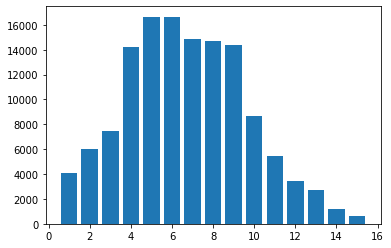

In [273]:
plt.bar(num, sc)

### Задание 4 (Найдите 10 самых частых: существительных)

In [288]:
word=[]
i=0
for respon in responses[0:200]:
    lemmas = mystem_analyzer.analyze(respon['text'])
    try:
        s=lemmas[2]['analysis'][0]['gr']
        w=lemmas[2]['analysis'][0]['lex']
        if s.split(',')[0]=='S':
            word.append(w)
    except KeyError:
        pass
    if i%100 == 0: print('Processed {} of {}'.format(i, len(texts)))
    i+=1
     
wr=Counter(word)
print(wr.most_common(20))


Processed 0 of 153499
Processed 100 of 153499
[('день', 31), ('банк', 4), ('время', 4), ('клиент', 4), ('год', 3), ('кредит', 3), ('май', 3), ('апрель', 3), ('оценка', 2), ('июнь', 2), ('вечер', 2), ('карта', 2), ('вклад', 1), ('март', 1), ('благодарность', 1), ('заявка', 1), ('филиал', 1), ('претензия', 1), ('неделя', 1), ('модератор', 1)]


### Задание 5 Кривая Ципфа

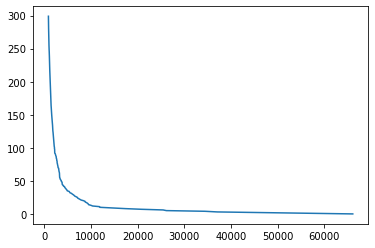

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline

freqs = list(freq_dict.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

### Задание 6 Ответьте на следующие вопросы:какое слово встречается чаще, "сотрудник" или "клиент"? сколько раз встречается слова "мошенничество" и "доверие"?

In [220]:
freq_dict_without_stop_words.get('сотрудник')

726

In [221]:
freq_dict_without_stop_words.get('клиент')

773

In [222]:
freq_dict_without_stop_words.get('мошенничество')

20

In [223]:
freq_dict_without_stop_words.get('доверие')

32

### Задание 7 (найти ключевые слова и биграмы для положительных отзывов (с оценкой 5) и отрицательных отзывов (с оценкой 1))

In [289]:
rating_grade_5=[]
rating_grade_1=[]
for respons in responses:
    if respons['rating_grade']==5:
        rating_grade_5.append(respons['text'])
    elif respons['rating_grade']==1:
        rating_grade_1.append(respons['text'])
        

In [290]:
len(rating_grade_5)

14713

In [291]:
len(rating_grade_1)

47387

### биграммы для положительных отзывов

In [307]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(rating_grade_5[0:1000])
feature_names=(vectorizer.get_feature_names())

In [308]:
dense = X.todense()

In [309]:
text=dense[0].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)

In [310]:
tfidf_ranking = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:40]:
    tfidf_ranking.append(phrase)

In [311]:
tfidf_ranking

['89 наталья',
 'берут кредиты',
 'вкладов офисе',
 'вклады берут',
 'вклады перед',
 'деньги во',
 'досрочно закрывали',
 'жена заказывала',
 'забыла заказать',
 'заказать на',
 'заказывала заранее',
 'закрывали вклады',
 'значительная работает',
 'кредиты желаю',
 'ленсовета 89',
 'лишнего жаль',
 'меня заметил',
 'мне хотя',
 'наталья не',
 'несут деньги',
 'но забыла',
 'озерки доступность',
 'отказала мне',
 'отпуском жена',
 'офиса для',
 'офисе озерки',
 'перед отпуском',
 'прием вкладов',
 'прикрыли прием',
 'профессионально ничего',
 'спб ленсовета',
 'сумма значительная',
 'хотя сумма',
 'что несут',
 'что прикрыли',
 'во вклады',
 'доступность офиса',
 'меня сотрудник',
 'не отказала',
 'ничего лишнего']

### биграммы для отрицательных отзывов

In [312]:
vectorizer = TfidfVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(rating_grade_1[0:1000])
feature_names=(vectorizer.get_feature_names())
dense = X.todense()

In [313]:
text=dense[0].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)

In [314]:
tfidf_ranking = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:40]:
    tfidf_ranking.append(phrase)

In [315]:
tfidf_ranking

['на счёт',
 'банку риторический',
 'долларовый счёт',
 'на долларовый',
 'руб доллар',
 'подтверждения операции',
 'счёт карты',
 'вопрос банку',
 'или что',
 '100 шагов',
 '154 рубля',
 '38 комиссия',
 '54 38',
 '54 поставить',
 '700 usd',
 '700 долларов',
 'pin ом',
 'usd дал',
 'usd плюс',
 'банкомате далее',
 'бы слушать',
 'была обычная',
 'было выгоднее',
 'было высокотехнологичного',
 'было опять',
 'быть чтобы',
 'валюты 58',
 'валюты выше',
 'введите пин',
 'ввёл пин',
 'вертела вставила',
 'взяла что',
 'видимо ее',
 'внесены на',
 'внести рубли',
 'всё взяла',
 'вывод другим',
 'вывод итоге',
 'выгоднее сделать',
 'высокотехнологичного подтверждения']

## Часть2

In [107]:
topic_pozitiv=[]
topic_negativ=[]

In [108]:
for respons in responses:
    if respons['rating_grade']==5:
        topic_pozitiv.append(respons['title'])
    elif respons['rating_grade']==1:
        topic_negativ.append(respons['title'])

In [109]:
len(topic_pozitiv)

14713

In [110]:
topic_pozitiv[45]

'Отличный банк для неуверенного вкладчика в валюте'

In [14]:
len(topic_negativ)

47387

In [5]:
from natasha import *

In [34]:
all_extractors = [LocationExtractor, AddressExtractor,
                  OrganisationExtractor, PersonExtractor]

In [35]:
extractors = [extractor() for extractor in all_extractors]

In [45]:
l=[]

In [49]:
for extractor in extractors:
    matches = extractor(topic_pozitiv[116])
    for match in matches:
        lf=(match.fact)
        print(match.fact)
    

Location(name='куда')


In [47]:
l

[Location(name='куда')]

In [54]:
c

Counter()

In [61]:
import collections
p = collections.Counter()
n = collections.Counter()
i=0

In [62]:
for extractor in extractors:
    try:
        for topic in topic_pozitiv:
            matches = extractor(topic)
            for match in matches:
                p[match.fact]+=1
            i+=1
            if i ==10000:
                break
    except AttributeError:
        pass
    except TypeError:
        pass
        

In [64]:
p.most_common(20)

[(Organisation(name='ВТБ'), 93),
 (Location(name='москва'), 66),
 (Organisation(name='МКБ'), 32),
 (Location(name='петербург'), 30),
 (Person(position=None,
         name=Name(first='тинькофф',
                   middle=None,
                   last=None,
                   nick=None)), 25),
 (Location(name='колл'), 19),
 (Location(name='интеза'), 16),
 (Location(name='россия'), 15),
 (Location(name='тверская'), 15),
 (Location(name='марьино'), 12),
 (Organisation(name='Ситибанк'), 11),
 (Organisation(name='Интеза'), 11),
 (Location(name='ленинский'), 10),
 (Location(name='куда'), 9),
 (Organisation(name='Росавтобанк'), 9),
 (Location(name='который'), 7),
 (Location(name='жуковский'), 6),
 (Location(name='пара'), 6),
 (Location(name='краснодар'), 6),
 (Location(name='митино'), 6)]

In [65]:
i=0
for extractor in extractors:
    try:
        for topic in topic_negativ:
            matches = extractor(topic)
            for match in matches:
                n[match.fact]+=1
            i+=1
            if i ==10000:
                break
    except AttributeError:
        pass
    except TypeError:
        pass
        

In [66]:
n.most_common(20)

[(Organisation(name='ВТБ'), 356),
 (Organisation(name='МКБ'), 80),
 (Organisation(name='Ситибанк'), 66),
 (Organisation(name='Ситибанка'), 59),
 (Location(name='колл'), 41),
 (Location(name='москва'), 34),
 (Location(name='россия'), 27),
 (Organisation(name='Ситибанке'), 27),
 (Organisation(name='Уралсиб'), 26),
 (Organisation(name='воз и'), 24),
 (Organisation(name='Промсвязьбанк'), 24),
 (Location(name='куда'), 16),
 (Organisation(name='Райффайзенбанк'), 16),
 (Organisation(name='Райффайзенбанка'), 16),
 (Organisation(name='Промсвязьбанка'), 15),
 (Organisation(name='Лукойл'), 15),
 (Person(position=None,
         name=Name(first='тинькофф',
                   middle=None,
                   last=None,
                   nick=None)), 14),
 (Person(position=None,
         name=Name(first='альф',
                   middle=None,
                   last=None,
                   nick=None)), 14),
 (Person(position=None,
         name=Name(first='маня',
                   middle=None,
    

In [130]:
from nltk.corpus import stopwords
mystopwords = stopwords.words('russian') + [
    'это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д',
    'который','прошлый','сей', 'свой', 'наш', 'мочь', 'такой'
]

In [111]:
ru_words = re.compile("[А-Яа-я]+")
def words_only(text):
    return " ".join(ru_words.findall(text))

In [131]:
def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

In [132]:
def preprocess(text):
    #return remove_stopwords(lemmatize(words_only(text.lower())))
    return remove_stopwords(words_only(text.lower()))

In [133]:
%%time
topic_pozitiv_clean=[]
for topic in topic_pozitiv:
    t = preprocess(topic)
    topic_pozitiv_clean.append(t)

Wall time: 148 ms


In [10]:
from gensim.corpora import Dictionary

In [159]:
texts = [text.split() for text in topic_pozitiv_clean]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [142]:
dictionary

In [143]:
dictionary.token2id

{'проблемы': 0,
 'решаются': 1,
 'вклада': 2,
 'договору': 3,
 'изменяют': 4,
 'открытому': 5,
 'проценты': 6,
 'дом': 7,
 'марксистская': 8,
 'отделение': 9,
 'помощь': 10,
 'спасибо': 11,
 'обслуживание': 12,
 'хорошее': 13,
 'банке': 14,
 'история': 15,
 'кредит': 16,
 'кредита': 17,
 'получения': 18,
 'ренессанс': 19,
 'большое': 20,
 'ещ': 21,
 'профессионалы': 22,
 'оперативное': 23,
 'решение': 24,
 'благодарность': 25,
 'георгию': 26,
 'тодуа': 27,
 'кошелек': 28,
 'перевод': 29,
 'банк': 30,
 'бизнеса': 31,
 'малого': 32,
 'отличный': 33,
 'время': 34,
 'карта': 35,
 'отзыв': 36,
 'положительный': 37,
 'здравствуйте': 38,
 'снова': 39,
 'довольна': 40,
 'работой': 41,
 'сотрудников': 42,
 'дебетовой': 43,
 'карты': 44,
 'оформление': 45,
 'деньги': 46,
 'поступили': 47,
 'сч': 48,
 'приятный': 49,
 'назначенный': 50,
 'несвоевременное': 51,
 'погашение': 52,
 'птс': 53,
 'штраф': 54,
 'вклад': 55,
 'клиентами': 56,
 'лучший': 57,
 'работе': 58,
 'специалист': 59,
 'договора': 

In [144]:
dictionary.id2token

{}

In [145]:
dictionary.dfs
#corpus = [dictionary.doc2bow(text) for text in texts]

{0: 105,
 1: 8,
 4: 1,
 6: 28,
 5: 1,
 3: 3,
 2: 172,
 9: 279,
 8: 2,
 7: 8,
 11: 761,
 10: 111,
 13: 175,
 12: 783,
 15: 47,
 18: 12,
 17: 104,
 19: 7,
 16: 394,
 14: 226,
 20: 53,
 22: 14,
 21: 8,
 23: 60,
 24: 121,
 25: 687,
 27: 1,
 26: 1,
 29: 48,
 28: 4,
 33: 346,
 30: 1748,
 32: 9,
 31: 12,
 35: 205,
 34: 26,
 37: 64,
 36: 224,
 39: 30,
 38: 3,
 40: 85,
 41: 34,
 42: 85,
 45: 70,
 43: 23,
 44: 231,
 46: 180,
 47: 2,
 48: 15,
 49: 43,
 50: 1,
 54: 4,
 51: 2,
 52: 13,
 53: 6,
 55: 231,
 57: 154,
 59: 5,
 58: 134,
 56: 23,
 62: 1,
 60: 10,
 63: 12,
 61: 91,
 65: 14,
 64: 6,
 66: 1,
 67: 4,
 68: 1,
 69: 156,
 70: 79,
 72: 73,
 73: 1,
 71: 6,
 75: 3,
 74: 2,
 76: 56,
 77: 12,
 80: 9,
 79: 14,
 78: 60,
 82: 15,
 81: 16,
 83: 1,
 84: 3,
 85: 2,
 87: 143,
 86: 1,
 92: 2,
 90: 6,
 91: 18,
 88: 1,
 89: 97,
 94: 4,
 93: 6,
 95: 68,
 99: 4,
 96: 4,
 98: 2,
 97: 148,
 100: 47,
 101: 19,
 102: 48,
 106: 2,
 105: 1,
 107: 7,
 103: 4,
 104: 2,
 108: 1,
 109: 3,
 112: 1,
 111: 24,
 110: 3,
 114:

In [98]:
dictionary[0]

'когда'

In [164]:
from gensim.models import lsimodel

In [165]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [166]:
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=30)

In [167]:
lsi.show_topics(10)

[(0,
  '0.751*"банк" + 0.565*"отличный" + 0.284*"хороший" + 0.077*"нормальный" + 0.061*"сервис" + 0.060*"нравится" + 0.060*"лучший" + 0.059*"очень" + 0.049*"благодарность" + 0.042*"удобный"'),
 (1,
  '-0.983*"благодарность" + -0.092*"сотруднику" + -0.071*"обслуживание" + -0.068*"сотрудникам" + -0.065*"банку" + -0.053*"банка" + 0.043*"банк" + -0.042*"спасибо" + 0.032*"отличный" + -0.024*"отличное"'),
 (2,
  '-0.664*"спасибо" + -0.643*"обслуживание" + -0.225*"отличное" + -0.200*"хорошее" + 0.100*"благодарность" + -0.087*"качественное" + -0.075*"банку" + -0.053*"работу" + -0.050*"банке" + -0.048*"понравилось"'),
 (3,
  '-0.710*"спасибо" + 0.603*"обслуживание" + 0.235*"отличное" + 0.173*"хорошее" + -0.098*"банку" + -0.066*"работу" + 0.062*"качественное" + -0.058*"огромное" + -0.057*"помощь" + 0.056*"понравилось"'),
 (4,
  '-0.667*"отличный" + 0.659*"хороший" + 0.222*"банк" + 0.159*"очень" + 0.136*"нравится" + -0.113*"сервис" + 0.064*"нормальный" + 0.038*"удобный" + 0.037*"лучший" + 0.037*"

## Часть3

In [4]:
from gensim.models import lsimodel
from gensim.models import TfidfModel
from gensim import similarities

In [5]:
rating=[]
text_ds=[]

In [6]:
for respons in responses:
    if respons['rating_grade']==5:
        text_ds.append(respons['text'])
        rating.append(5)
        
    elif respons['rating_grade']==1:
        text_ds.append(respons['text'])
        rating.append(1)
        

In [7]:
df=pd.DataFrame({'text': text_ds,
                'rating':rating })

In [8]:
df.head()

,text,rating
0,Открыт вклад и счет в USD. Плюс к этому есть з...,1
1,Доброго времени! Вчера мне поступило смс-уведо...,1
2,"05.06.2015г. около 15 часов, пришел в указанны...",1
3,Для оплаты коммунальных платежей пользуюсь пла...,1
4,В апреле этого года пришла в отделение сбербан...,1


In [9]:
df.shape

(62100, 2)

In [11]:
import re
from nltk.corpus import stopwords

In [12]:
from pymystem3 import Mystem
m = Mystem()

In [13]:
mystopwords = stopwords.words('russian') + [
    'это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д',
    'который','прошлый','сей', 'свой', 'наш', 'мочь', 'такой'
]
ru_words = re.compile("[А-Яа-я]+")


def words_only(text):
    return " ".join(ru_words.findall(text))


def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "


def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

    
def preprocess(text):
    #return remove_stopwords(lemmatize(words_only(text.lower())))
    return remove_stopwords(words_only(text.lower()))

In [14]:
%%time
df.text = df.text.apply(preprocess)

Wall time: 30.1 s


In [15]:
df.head()

,text,rating
0,открыт вклад счет плюс этому зарплатная карта ...,1
1,доброго времени вчера поступило смс уведомлени...,1
2,г около часов пришел указанный офис намерением...,1
3,оплаты коммунальных платежей пользуюсь пластик...,1
4,апреле года пришла отделение сбербанка г чапае...,1


In [16]:
texts = [text.split() for text in df.text]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [17]:
len(corpus)

62100

In [18]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [21]:
# corpus_tfidf.corpus[5]

In [24]:
import torch
from torchtext import data
from sklearn.model_selection import train_test_split

#### Возьмем небольшую часть от датасета, что бы выстрее посчитать

In [128]:
X_Train, X_Test, y_train, y_Test = train_test_split(df.text, df.rating, test_size=0.2, random_state=42)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_Test, y_Test, test_size=0.3, random_state=42)

In [107]:
print(len(X_train))
print(len(X_test))

8694
3726


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

### CountVectorizer

In [130]:
vec_c = CountVectorizer(ngram_range=(1, 3))
bow_c = vec_c.fit_transform(X_train)
#bow_c_test=vec_c.fit_transform(X_test)

In [131]:
clf = LogisticRegression(random_state=42)
clf.fit(bow_c, y_train)
pred = clf.predict(vec_c.transform(X_test))
print(classification_report(pred, y_test))

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           1       0.99      0.94      0.96      2939
           5       0.82      0.95      0.88       787

    accuracy                           0.94      3726
   macro avg       0.90      0.95      0.92      3726
weighted avg       0.95      0.94      0.95      3726



### TfidfVectorizer

In [71]:
len(X_train)

8694

In [132]:
vec_t = TfidfVectorizer(ngram_range=(1, 3))
bow_t = vec_t.fit_transform(X_train)

In [133]:
clf = LogisticRegression(random_state=42)
clf.fit(bow_t, y_train)
pred = clf.predict(vec_t.transform(X_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           1       1.00      0.87      0.93      3213
           5       0.56      0.99      0.71       513

    accuracy                           0.89      3726
   macro avg       0.78      0.93      0.82      3726
weighted avg       0.94      0.89      0.90      3726



### TruncatedSVD

In [91]:
vectors = TfidfVectorizer().fit_transform(X_train) # строим тф-идф матрицу документ-слово
X_reduced = TruncatedSVD(n_components=10, random_state=0).fit_transform(vectors) # оставляем n главных компонент

In [75]:
clf = LogisticRegression()
clf.fit(X_reduced, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
vectors_test = TfidfVectorizer().fit_transform(X_test) 
X_reduced_test = TruncatedSVD(n_components=10, random_state=0).fit_transform(vectors_test)

In [77]:
X_reduced_test.shape

(3726, 10)

In [78]:
y_pred = clf.predict(X_reduced_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.95      0.85      0.90      3131
           5       0.50      0.77      0.61       595

    accuracy                           0.84      3726
   macro avg       0.73      0.81      0.75      3726
weighted avg       0.88      0.84      0.85      3726



### LAD

In [144]:
X_Test.shape

(12420,)

In [145]:
vectors_for_lad = TfidfVectorizer(ngram_range=(2, 3)).fit_transform(X_Test)

In [146]:
y_Test.shape

(12420,)

In [147]:
vectors_for_lad.shape

(12420, 2974428)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(vectors_for_lad, y_Test, test_size=0.3, random_state=42)

In [149]:
X_train.shape

(8694, 2974428)

In [150]:
X_test.shape

(3726, 2974428)

In [151]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)
#vec_l=lda.fit_transform(bow_c)
vec_l=lda.fit_transform(X_train)

In [152]:
vec_l.shape

(8694, 10)

In [153]:
clf = LogisticRegression(random_state=42)
clf.fit(vec_l, y_train)
#pred_12 = clf.predict(lda.transform(vec_c.transform(X_test)))
pred_12 = clf.predict(lda.transform(X_test))
print(classification_report(pred_12, y_test))

F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           1       1.00      0.75      0.86      3726
           5       0.00      0.00      0.00         0

    accuracy                           0.75      3726
   macro avg       0.50      0.38      0.43      3726
weighted avg       1.00      0.75      0.86      3726

